<a href="https://colab.research.google.com/github/anonborb/CMSC421_FinalProject/blob/main/CMSC421_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CMSC421 Final Project
Team Members: Jordan Maggin, Lex Kim, Zhuo Cheng Xie, Neel Jay, Hylene Wu

Project Description: The program will train on the set of images and gather information on airplanes from these images. With this information, it will attempt to both locate and identify airplanes in different sets of videos.


How-to-use-YOLO: https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

Installing YOLO

In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image


Importing dataset from Roboflow Project

In [ ]:
import os
root_dir = os.getcwd()
!mkdir {root_dir}/datasets
%cd {root_dir}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="nr1RFEWRZXe3o3eQV1ns")
project = rf.workspace("cmsc421-final-project").project("plane-detection-eyzak")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Custom Training

(Weights are saved to /content/runs/detect/train3)

In [ ]:
%cd {root_dir}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.7 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Plane-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualiz

Resulting Confusion Matrix

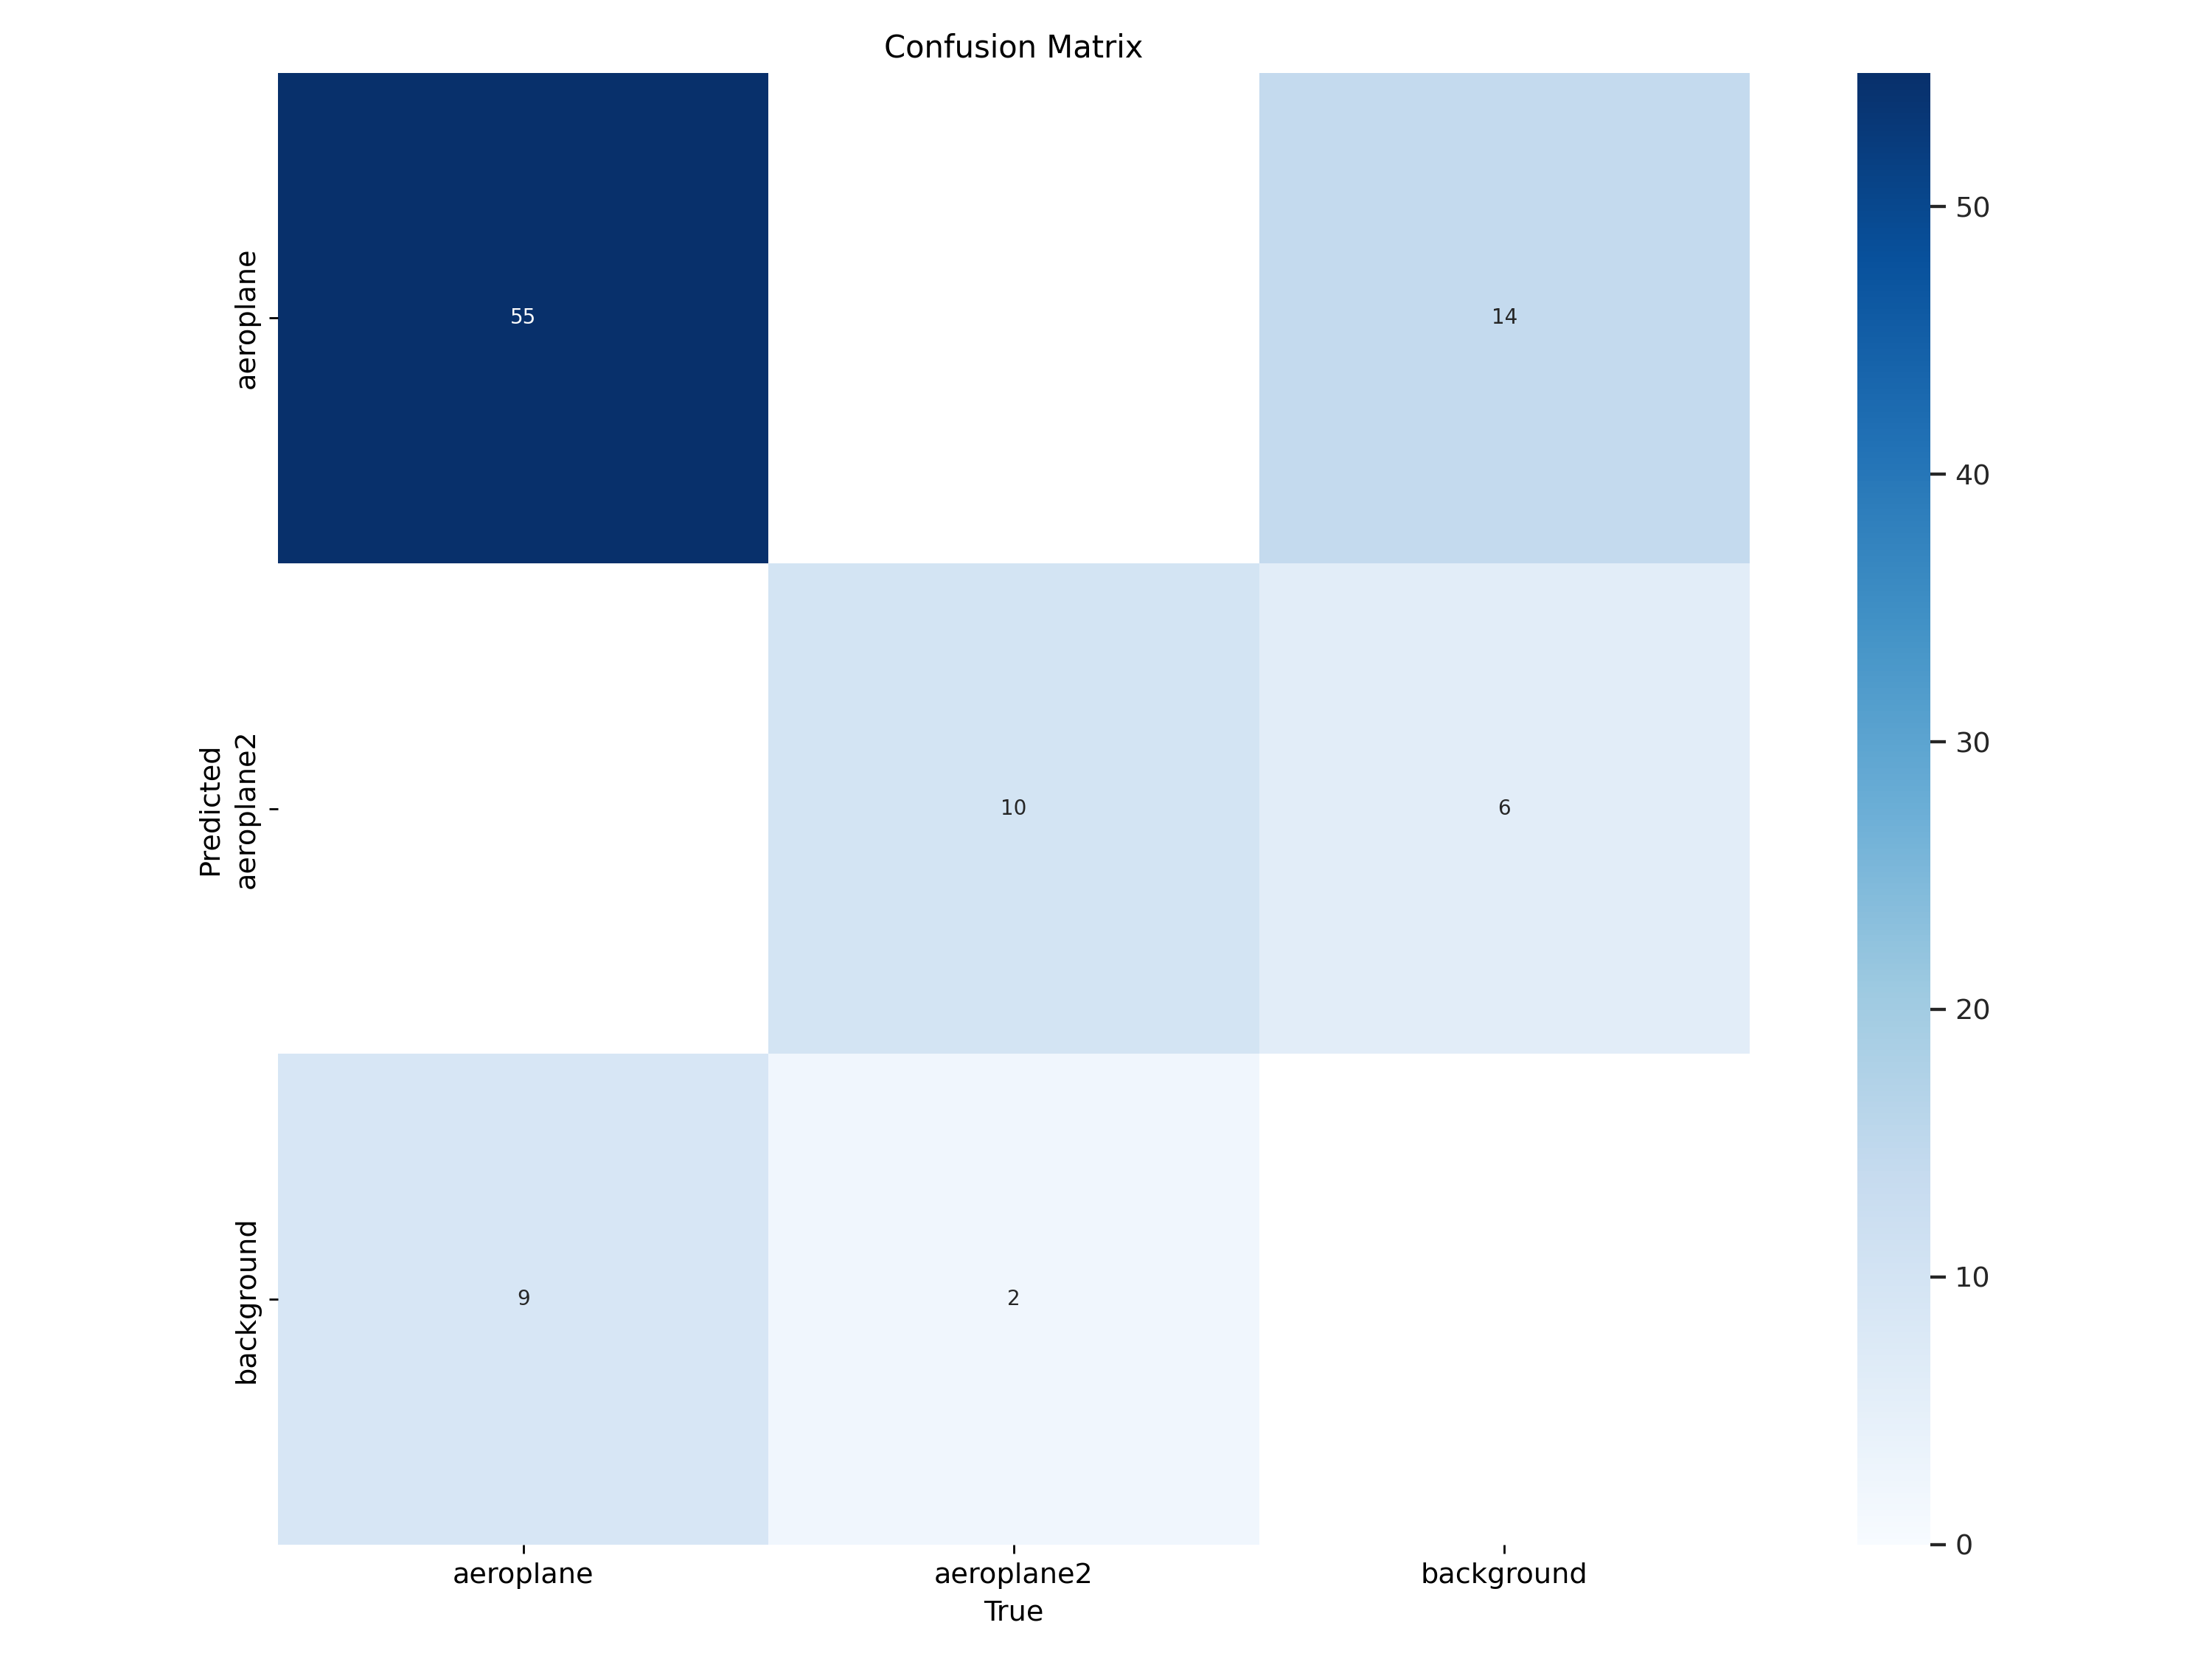

In [ ]:
Image(filename=f'{root_dir}/runs/detect/train3/confusion_matrix.png', width=600)

Validate model

In [ ]:
!yolo task=detect mode=val model={root_dir}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Plane-Detection-1/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.09it/s]
                   all         59         76       0.94      0.758      0.848       0.47
             aeroplane         59         64      0.907      0.766      0.858      0.549
            aeroplane2         59         12      0.973       0.75      0.839      0.391
Speed: 3.2ms preprocess, 20.2ms inference, 0.0ms loss, 12.2ms postproce

Inference/Predict with Model

In [ ]:
!yolo task=detect mode=predict model={root_dir}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/26 /content/datasets/Plane-Detection-1/test/images/000431_jpg.rf.381985d7df337d88cebb202116f82ccc.jpg: 640x640 1 aeroplane, 16.3ms
image 2/26 /content/datasets/Plane-Detection-1/test/images/000647_jpg.rf.40d4842334705a5011d680365b664d50.jpg: 640x640 1 aeroplane, 16.4ms
image 3/26 /content/datasets/Plane-Detection-1/test/images/001102_jpg.rf.67e769ce1fe4dac7c8ec307bdecc19d6.jpg: 640x640 2 aeroplanes, 16.4ms
image 4/26 /content/datasets/Plane-Detection-1/test/images/001761_jpg.rf.02ff6aabc126e1eec7ac4378f9700bba.jpg: 640x640 1 aeroplane, 16.4ms
image 5/26 /content/datasets/Plane-Detection-1/test/images/002279_jpg.rf.c50b6ac15d8bf07a5f2fa6cc4a342d1e.jpg: 640x640 1 aeroplane, 16.4ms
image 6/26 /content/datasets/Plane-Detection-1/test/images/002869_jpg.rf.610157c8595e4762dd563a711dcf5bea.jpg: 640x640 2 aeroplanes, 1

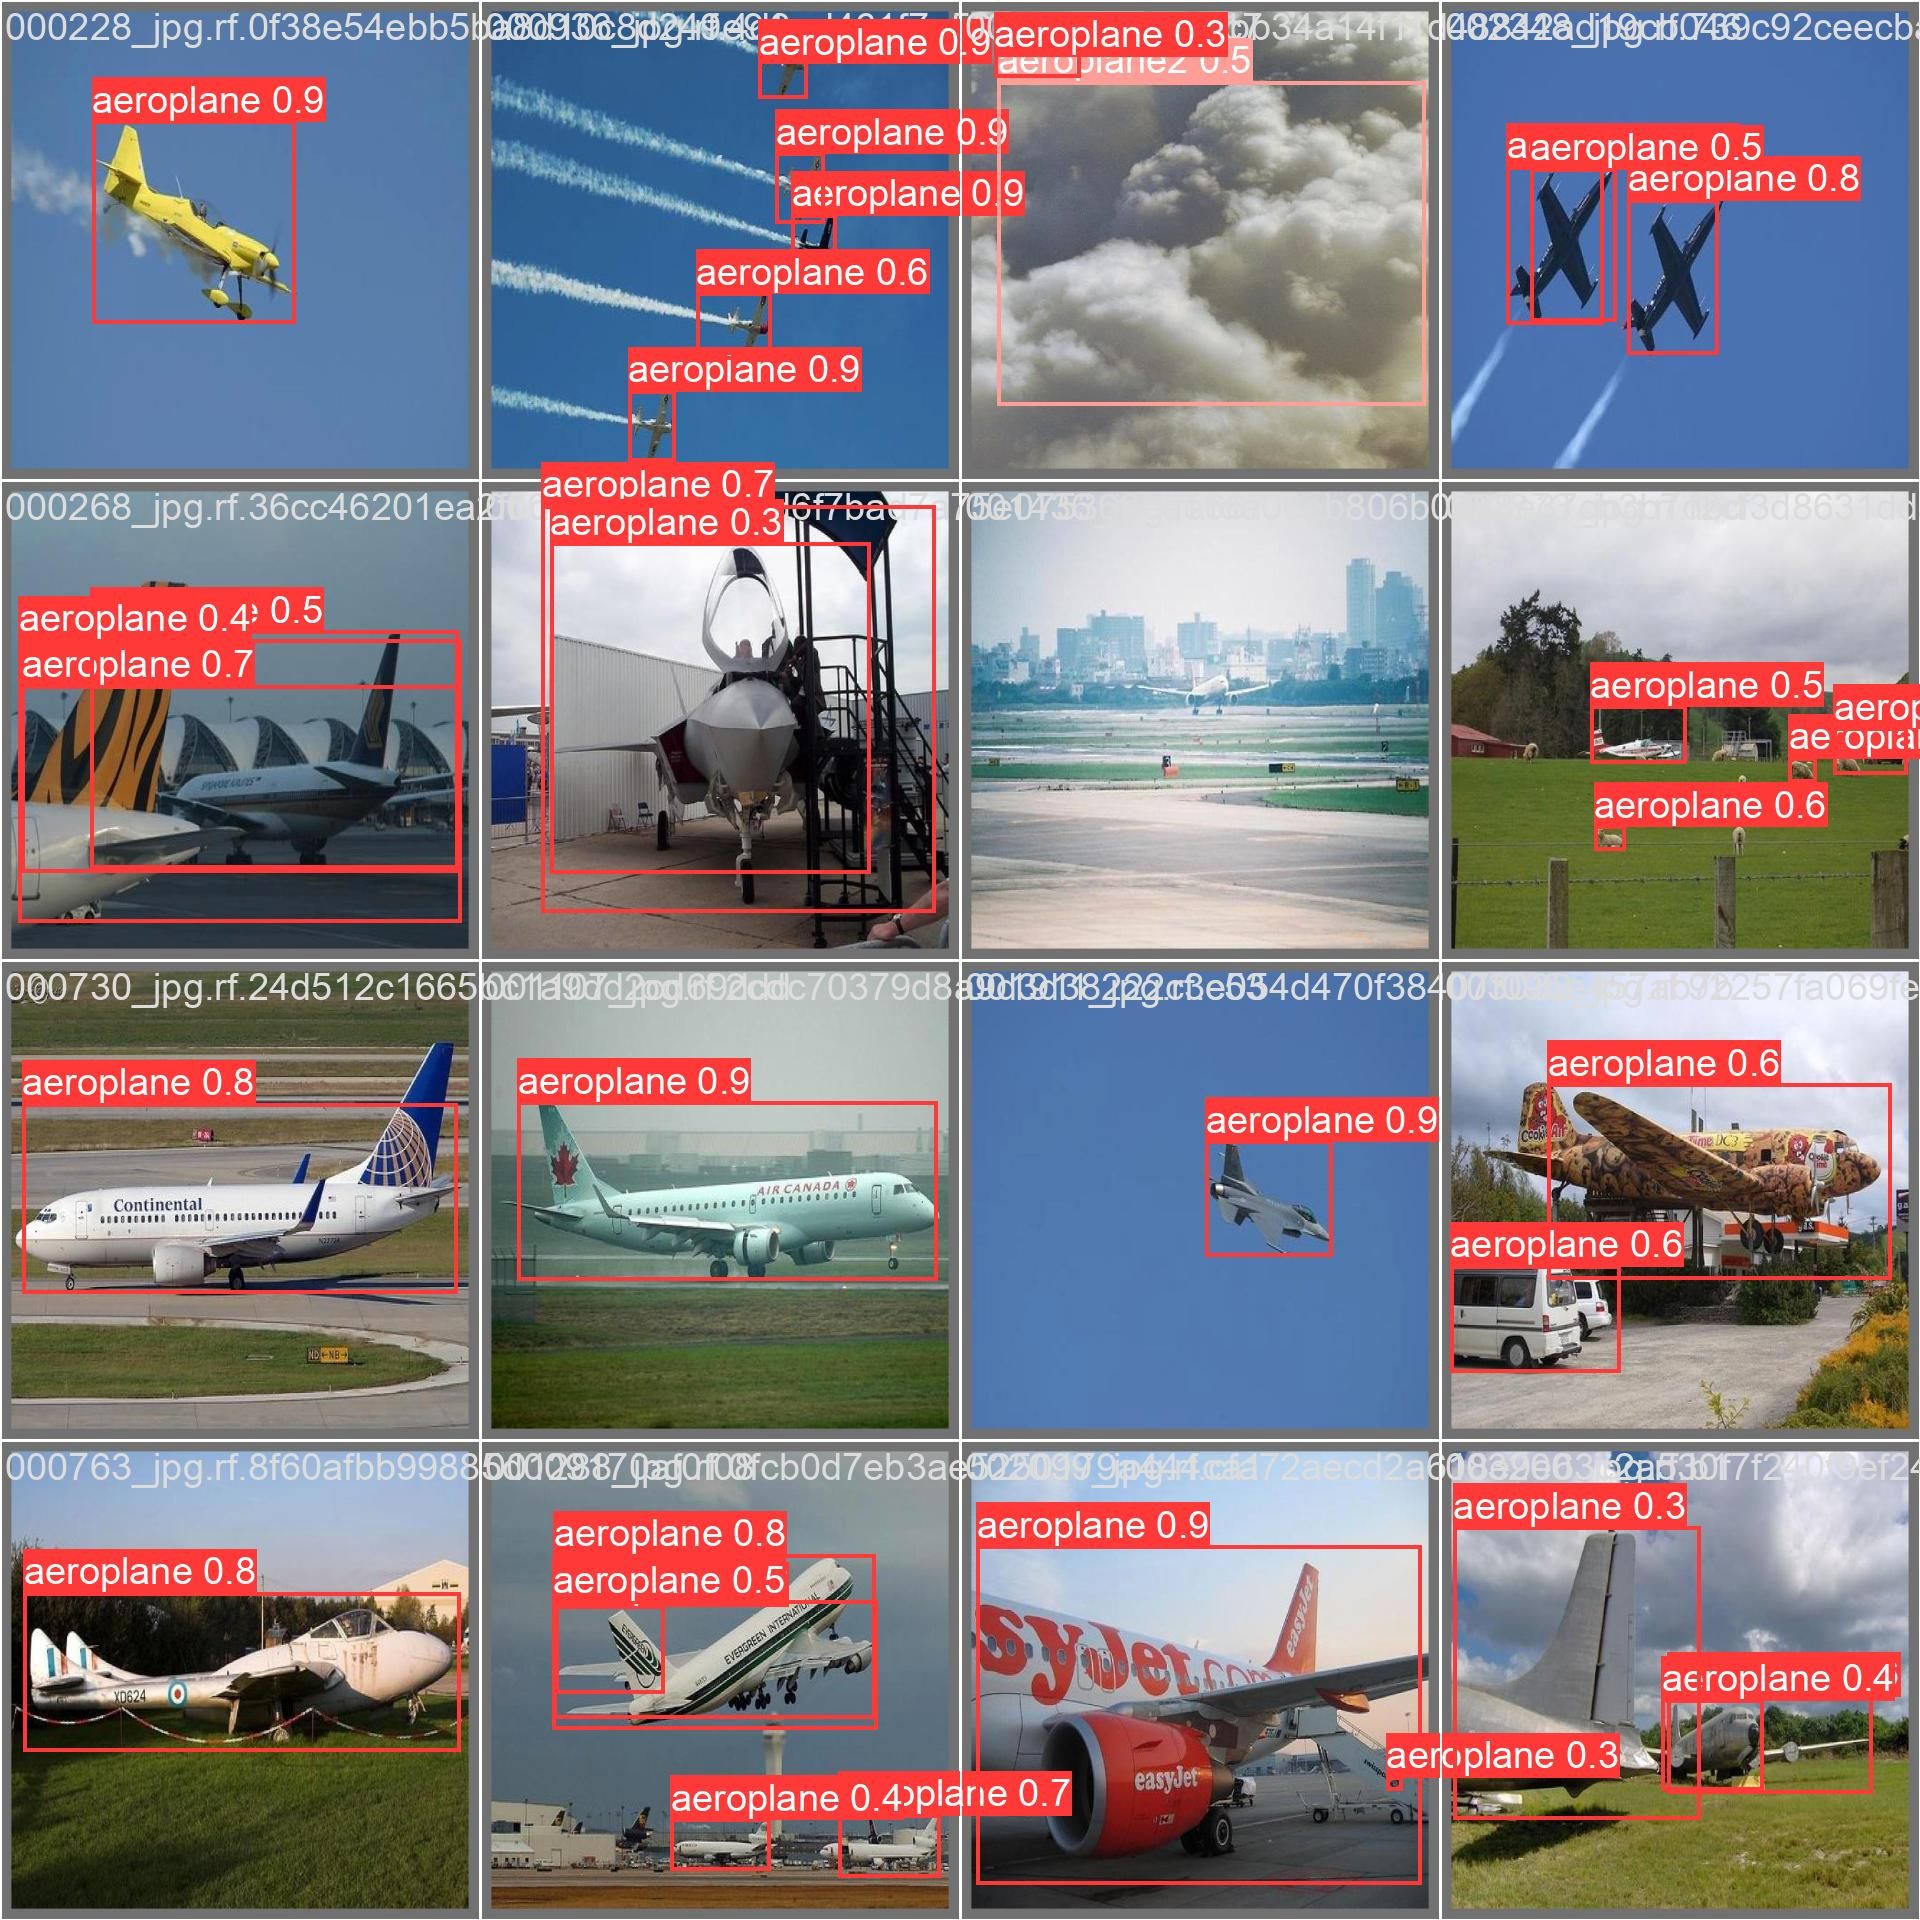

In [ ]:
Image(filename=f'{root_dir}/runs/detect/train3/val_batch0_pred.jpg', width=600)

Deploying to Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{root_dir}/runs/detect/train3/")

View the status of your deployment at: https://app.roboflow.com/cmsc421-final-project/plane-detection-eyzak/1
Share your model with the world at: https://universe.roboflow.com/cmsc421-final-project/plane-detection-eyzak/model/1
